In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coll_events = dd.read_csv('Dataset/Append Dataset/collection_events/append_collection_events.csv', assume_missing = True, dtype={'start_after_collection_ids': 'object'})

In [3]:
inst_events = dd.read_csv('Dataset/Append Dataset/instance_events/append_instance_events.csv', assume_missing = True)

In [4]:
print('Collection Events Table')
print('Number of Rows : ', len(coll_events))
print('Number of Non Null Row For Each Column : ')
coll_events.count().compute()

Collection Events Table
Number of Rows :  62653826
Number of Non Null Row For Each Column : 


Unnamed: 0                    62653826
time                          62653826
type                          62653826
collection_id                 62653826
priority                      62653826
vertical_scaling              62653769
scheduler                     62653769
scheduling_class              62653826
missing_type                       455
collection_type               62653826
alloc_collection_id            5647510
user                          62653826
collection_name               62653826
collection_logical_name       62653826
parent_collection_id          22284570
start_after_collection_ids    47613701
max_per_machine                 908492
max_per_switch                  208422
dtype: int64

In [5]:
print('Collection Events Table')
print('Number of Rows : ', len(coll_events))
print('Number of Null Row For All Column : ', coll_events.isna().sum().sum().compute())
print('Number of Null Row For Each Column : ')
coll_events.isna().sum().compute()

Collection Events Table
Number of Rows :  62653826
Number of Null Row For All Column :  299259920
Number of Null Row For Each Column : 


Unnamed: 0                           0
time                                 0
type                                 0
collection_id                        0
priority                             0
vertical_scaling                    57
scheduler                           57
scheduling_class                     0
missing_type                  62653371
collection_type                      0
alloc_collection_id           57006316
user                                 0
collection_name                      0
collection_logical_name              0
parent_collection_id          40369256
start_after_collection_ids    15040125
max_per_machine               61745334
max_per_switch                62445404
dtype: int64

In [6]:
print('Instance Events Table')
print('Number of Rows : ', len(inst_events))
print('Number of Null Row For All Column : ', inst_events.isna().sum().sum().compute())
print('Number of Null Row For Each Column : ')
inst_events.isna().sum().compute()

Instance Events Table
Number of Rows :  545842803
Number of Null Row For All Column :  841664497
Number of Null Row For Each Column : 


Unnamed: 0                         0
time                               0
type                               0
collection_id                      0
priority                           0
resource_request.cpus          13974
resource_request.memory        13974
scheduling_class                   0
missing_type               544856601
collection_type                    0
alloc_collection_id                0
instance_index                     0
machine_id                 262113865
alloc_instance_index        34666083
dtype: int64

In [7]:
print('Instance Events Table')
print('Number of Rows : ', len(inst_events))
print('Number of Non Null Row For Each Column : ')
inst_events.count().compute()

Instance Events Table
Number of Rows :  545842803
Number of Non Null Row For Each Column : 


Unnamed: 0                 545842803
time                       545842803
type                       545842803
collection_id              545842803
priority                   545842803
resource_request.cpus      545828829
resource_request.memory    545828829
scheduling_class           545842803
missing_type                  986202
collection_type            545842803
alloc_collection_id        545842803
instance_index             545842803
machine_id                 283728938
alloc_instance_index       511176720
dtype: int64

In [4]:
coll_events = coll_events[coll_events.type > 4]
coll_events = coll_events[coll_events.type < 8]

In [5]:
coll_events = coll_events.replace({'type':{4:0, 5:0, 6:1, 7:0, 8:0}})

In [6]:
coll_events = coll_events.drop_duplicates(subset=['collection_id'])

In [7]:
inst_events = inst_events[inst_events.type > 4]
inst_events = inst_events[inst_events.type < 8]

In [8]:
inst_events = inst_events.replace({'type':{4:0, 5:0, 6:1, 7:0, 8:0}})

In [9]:
inst_events = inst_events.drop_duplicates(subset=['collection_id'])

In [10]:
merged_job = inst_events.merge(coll_events, left_on='collection_id', right_on='collection_id')

In [11]:
merged_job = merged_job.dropna(subset=['type_x'])
merged_job = merged_job.dropna(subset=['type_y'])

In [16]:
print('Merged Events Table')
print('Checking Null Values')
print('Number of Rows : ', len(merged_job))
print('Number of Null Row For All Column : ', merged_job.isna().sum().sum().compute())
print('Number of Null Row For Each Column : ')
merged_job.isna().sum().compute()

Merged Events Table
Checking Null Values
Number of Rows :  2854121
Number of Null Row For All Column :  16854105
Number of Null Row For Each Column : 


Unnamed: 0_x                        0
time_x                              0
type_x                              0
collection_id                       0
priority_x                          0
resource_request.cpus               0
resource_request.memory             0
scheduling_class_x                  0
missing_type_x                2847027
collection_type_x                   0
alloc_collection_id_x               0
instance_index                      0
machine_id                     152166
alloc_instance_index            98908
Unnamed: 0_y                        0
time_y                              0
type_y                              0
priority_y                          0
vertical_scaling                    0
scheduler                           0
scheduling_class_y                  0
missing_type_y                2854103
collection_type_y                   0
alloc_collection_id_y         2755212
user                                0
collection_name                     0
collection_l

In [12]:
merged_job.describe(include = "all")

,Unnamed: 0_x,time_x,type_x,collection_id,priority_x,resource_request.cpus,resource_request.memory,scheduling_class_x,missing_type_x,collection_type_x,alloc_collection_id_x,instance_index,machine_id,alloc_instance_index,Unnamed: 0_y,time_y,type_y,priority_y,vertical_scaling,scheduler,scheduling_class_y,missing_type_y,collection_type_y,alloc_collection_id_y,user,collection_name,collection_logical_name,parent_collection_id,start_after_collection_ids,max_per_machine,max_per_switch
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,float64,object,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Text(0.5, 1.0, 'Feature Correlating with Job Failure')

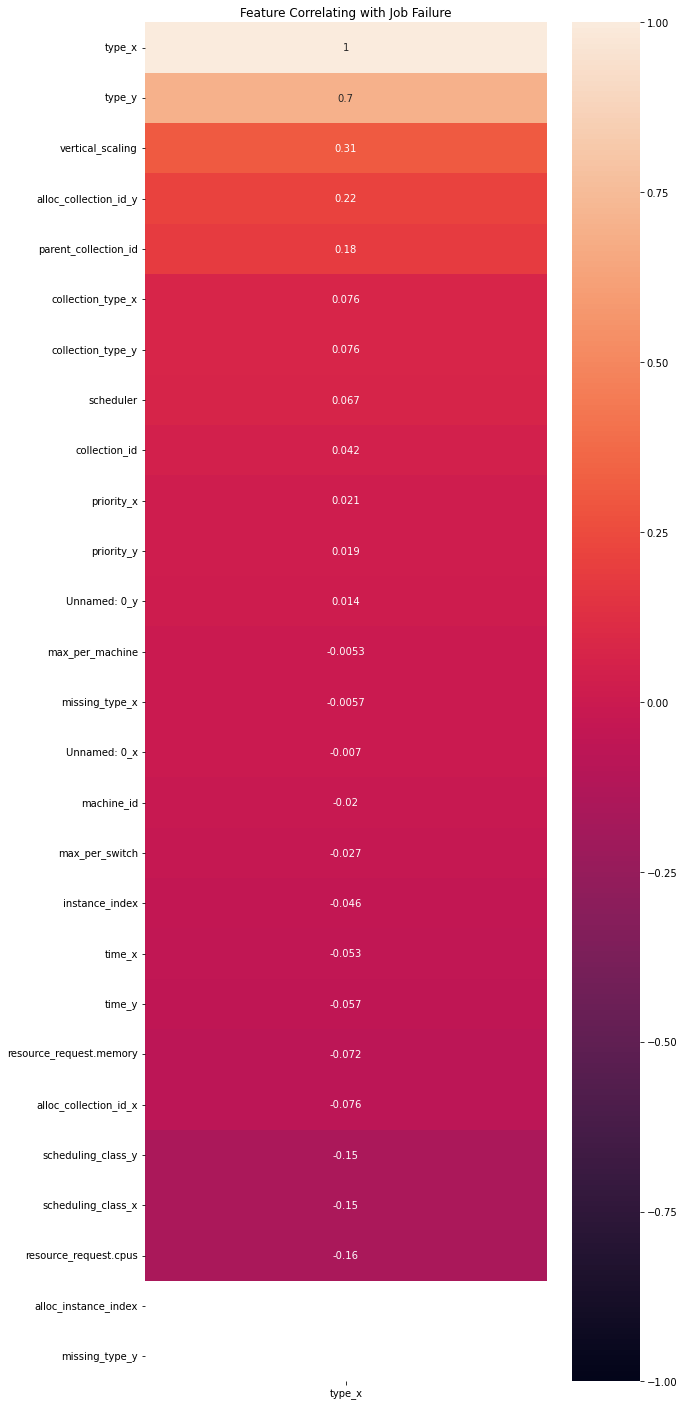

In [18]:
plt.figure(figsize=(9,25))
heatmap = sns.heatmap(merged_job.corr()[['type_x']].compute().sort_values(by='type_x', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Feature Correlating with Job Failure')

In [13]:
merged_job = merged_job.drop(columns=['type_y', 'alloc_collection_id_y', 'parent_collection_id', 'collection_type_y', 'priority_y', 'Unnamed: 0_y', 'missing_type_x', 
                                      'Unnamed: 0_x', 'machine_id', 'instance_index', 'time_x', 'time_y', 'alloc_collection_id_x', 'scheduling_class_y', 'scheduling_class_x', 'alloc_instance_index', 
                                      'missing_type_y', 'user', 'collection_name', 'collection_logical_name', 'start_after_collection_ids'])

In [20]:
print('Merged Events Table')
print('Checking Null Values')
print('Number of Rows : ', len(merged_job))
print('Number of Null Row For All Column : ', merged_job.isna().sum().sum().compute())
print('Number of Null Row For Each Column : ')
merged_job.isna().sum().compute()

Merged Events Table
Checking Null Values
Number of Rows :  2854121
Number of Null Row For All Column :  5660009
Number of Null Row For Each Column : 


type_x                           0
collection_id                    0
priority_x                       0
resource_request.cpus            0
resource_request.memory          0
collection_type_x                0
vertical_scaling                 0
scheduler                        0
max_per_machine            2811878
max_per_switch             2848131
dtype: int64

In [14]:
merged_job['max_per_machine'] = merged_job['max_per_machine'].fillna(merged_job['max_per_machine'].max())
merged_job['max_per_switch'] = merged_job['max_per_switch'].fillna(merged_job['max_per_switch'].max())

In [15]:
merged_job = merged_job.rename(columns = {'type_x' : 'type', 'priority_x' : 'priority', 'collection_type_x' : 'collection_type'})

### Merged Job with Instance Usage

#### Instance Usage New Energy Column

In [16]:
inst_usage = dd.read_csv('Dataset/Append Dataset/instance_usage/append_instance_usage.csv', assume_missing = True)

In [17]:
merged_job = merged_job.merge(inst_usage, left_on='collection_id', right_on='collection_id')

In [18]:
merged_job.describe(include = "all")

,type,collection_id,priority,resource_request.cpus,resource_request.memory,collection_type_x,vertical_scaling,scheduler,max_per_machine,max_per_switch,Unnamed: 0,start_time,end_time,instance_index,machine_id,alloc_collection_id,alloc_instance_index,collection_type_y,average_usage.cpus,average_usage.memory,maximum_usage.cpus,maximum_usage.memory,random_sample_usage.cpus,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution.0,tail_cpu_usage_distribution.1,tail_cpu_usage_distribution.2,tail_cpu_usage_distribution.3,tail_cpu_usage_distribution.4,tail_cpu_usage_distribution.5,tail_cpu_usage_distribution.6,tail_cpu_usage_distribution.7,tail_cpu_usage_distribution.8,cpu_usage_distribution.0,cpu_usage_distribution.1,cpu_usage_distribution.2,cpu_usage_distribution.3,cpu_usage_distribution.4,cpu_usage_distribution.5,cpu_usage_distribution.6,cpu_usage_distribution.7,cpu_usage_distribution.8,cpu_usage_distribution.9,cpu_usage_distribution.10,tail_cpu_usage_distribution
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Text(0.5, 1.0, 'Feature Correlating with Job Failure')

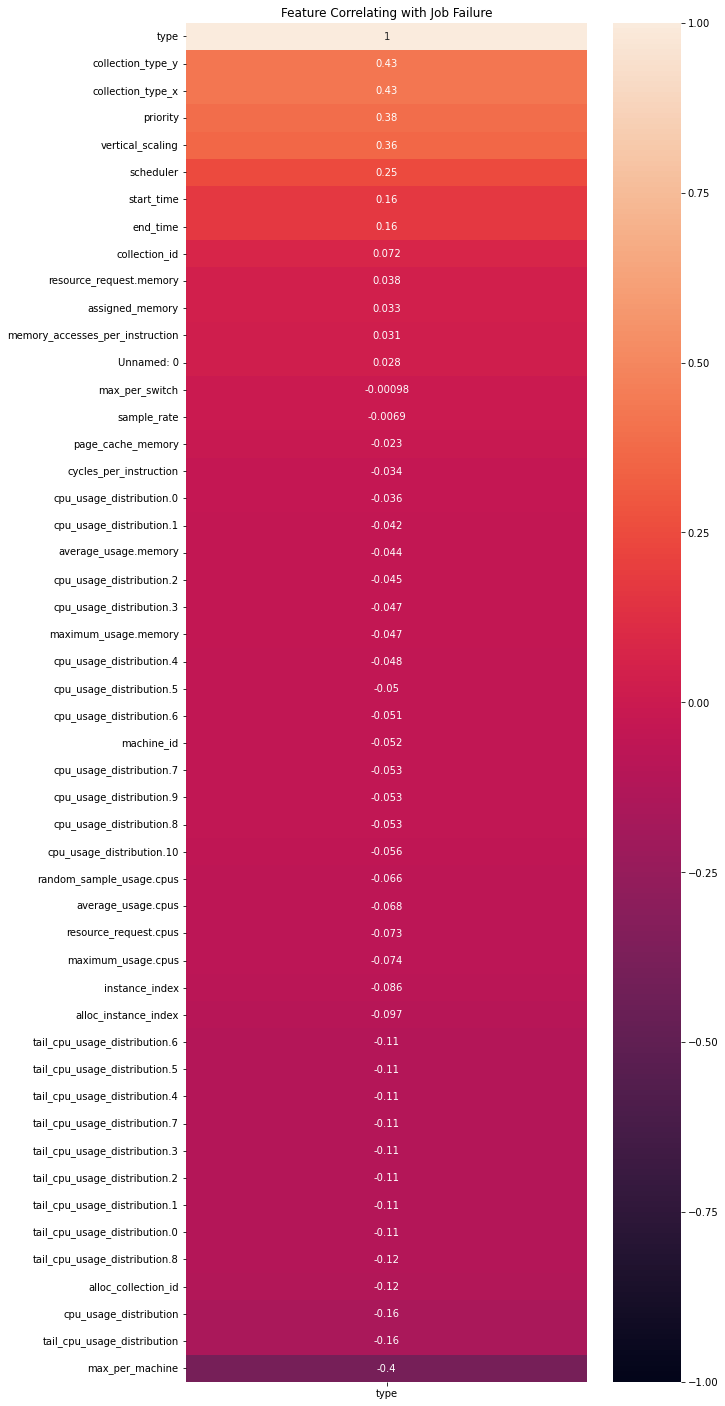

In [26]:
plt.figure(figsize=(9,25))
heatmap = sns.heatmap(merged_job.corr()[['type']].compute().sort_values(by='type', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Feature Correlating with Job Failure')

In [19]:
merged_job = merged_job.drop(columns=['collection_type_y', 'Unnamed: 0', 'sample_rate', 'cycles_per_instruction', 'cpu_usage_distribution.6', 'cpu_usage_distribution.7', 
                                      'cpu_usage_distribution.8', 'cpu_usage_distribution.9', 'cpu_usage_distribution.10', 'page_cache_memory', 'maximum_usage.memory', 'average_usage.memory', 
                                      'machine_id', 'random_sample_usage.cpus', 'average_usage.cpus', 'maximum_usage.cpus', 'instance_index', 'alloc_instance_index', 'tail_cpu_usage_distribution.0', 
                                      'tail_cpu_usage_distribution.1', 'tail_cpu_usage_distribution.2', 'tail_cpu_usage_distribution.3', 'tail_cpu_usage_distribution.4', 'tail_cpu_usage_distribution.5', 
                                      'tail_cpu_usage_distribution.6', 'tail_cpu_usage_distribution.7', 'tail_cpu_usage_distribution.8', 'alloc_collection_id', 'tail_cpu_usage_distribution', 
                                      'max_per_machine', 'max_per_switch'])

In [20]:
merged_job.describe(include = "all")

,type,collection_id,priority,resource_request.cpus,resource_request.memory,collection_type_x,vertical_scaling,scheduler,start_time,end_time,assigned_memory,memory_accesses_per_instruction,cpu_usage_distribution,cpu_usage_distribution.0,cpu_usage_distribution.1,cpu_usage_distribution.2,cpu_usage_distribution.3,cpu_usage_distribution.4,cpu_usage_distribution.5
npartitions=1,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [21]:
merged_job = merged_job.assign(timestamp = merged_job['end_time'] - merged_job['start_time'])

In [22]:
merged_job = merged_job.drop(columns=['start_time', 'end_time'])

In [23]:
merged_job = merged_job[['timestamp', 'type', 'collection_id', 'priority','resource_request.cpus', 'resource_request.memory', 'collection_type_x', 'vertical_scaling', 'scheduler', 'assigned_memory','memory_accesses_per_instruction', 
                         'cpu_usage_distribution.0', 'cpu_usage_distribution.1', 'cpu_usage_distribution.2', 'cpu_usage_distribution.3', 'cpu_usage_distribution.4', 'cpu_usage_distribution.5']]

In [24]:
merged_job = merged_job.rename(columns = {'collection_type_x' : 'collection_type'})

In [25]:
merged_job.describe(include = "all")

,timestamp,type,collection_id,priority,resource_request.cpus,resource_request.memory,collection_type,vertical_scaling,scheduler,assigned_memory,memory_accesses_per_instruction,cpu_usage_distribution.0,cpu_usage_distribution.1,cpu_usage_distribution.2,cpu_usage_distribution.3,cpu_usage_distribution.4,cpu_usage_distribution.5
npartitions=1,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [26]:
merged_job.to_csv('Dataset/merged_job.csv', single_file = True)

['F:/Files/TraceDataset/Output/Dataset/merged_job.csv']